In [1]:
#La Potencia viene dada por la siguiente formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

Dónde:

P es la potencia necesaria

$\rho$ es la densidad del aire

V es la velocidad

wV es velocidad el viento

Cd es el coeficiente de drag

A es el área efectiva

Cr es el coeficiente de rozamiento

$\%$ es la pendiente

m es la masa total del conjunto bicicleta - ciclista

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np


### Cargamos los datos

In [47]:
#path = '../Entrenamientos/result_tramos.xlsx'
path = '../Entrenamientos/Procesado_Tramos.xlsx'

In [48]:
df = pd.read_excel(path)

In [4]:
df.describe()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,50.038869,3626.088339,3695.734982,166.896851,138.798587,959.941520,30.333649,-inf,inf
std,33.047386,2359.016002,2353.448358,75.436162,294.498658,1563.664211,9.299367,NaN,NaN
min,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,-inf,-6.677410
25%,23.000000,1523.000000,1603.000000,105.409955,20.000000,121.776438,24.367954,-8.386325,-1.070971
50%,47.000000,3523.000000,3526.000000,171.142659,56.000000,468.799905,29.952505,-2.166430,-0.007052
75%,70.000000,5937.500000,6115.000000,221.707288,125.000000,905.673921,36.336244,7.279960,1.200993
max,129.000000,7729.000000,7796.000000,648.000000,2761.000000,10273.070042,64.800000,26.699485,inf


In [49]:
df = df[df["viento_aparente"]!=-np.inf]

In [6]:
df.describe()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,50.078014,3617.893617,3687.783688,166.678684,139.280142,963.345568,30.441215,-0.200655,-0.033003
std,33.099563,2359.171158,2353.821173,75.480779,294.910571,1565.393258,9.137827,11.146978,2.166262
min,0.000000,0.000000,12.000000,0.000000,1.000000,9.079168,0.770052,-21.641147,-6.677410
25%,23.000000,1522.500000,1596.500000,105.383618,20.250000,129.987954,24.412312,-8.369160,-1.072187
50%,47.000000,3514.500000,3525.500000,171.140529,56.500000,469.955006,29.964252,-1.899402,-0.013285
75%,70.000000,5937.250000,6124.000000,221.205250,125.000000,906.990831,36.381969,7.301920,1.194253
max,129.000000,7729.000000,7796.000000,648.000000,2761.000000,10273.070042,64.800000,26.699485,7.137195


In [7]:
df.head()

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,prueba
0,0,0,65,77.836186,106,966.000000,32.807547,6.718880,-3.377386,20180406_LEVS_195_90_R_E.gpx
1,1,65,432,255.381555,980,4819.000000,17.702449,7.188764,4.181100,20180406_LEVS_195_90_R_E.gpx
2,2,432,468,152.194252,44,473.935824,38.776567,8.537489,-1.737873,20180406_LEVS_195_90_R_E.gpx
3,3,468,532,248.770434,120,813.223602,24.396708,8.334437,2.662585,20180406_LEVS_195_90_R_E.gpx
4,4,532,548,155.753257,21,206.720563,35.437811,8.287183,-0.873144,20180406_LEVS_195_90_R_E.gpx


In [8]:
# Target=Spd

In [50]:
df_lm = df[['pwr','spd','porc','viento_aparente']]

In [51]:
df_lm_x = df[['pwr','porc','viento_aparente']]
df_lm_y = df[['spd']]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

### RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [13]:
rf = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


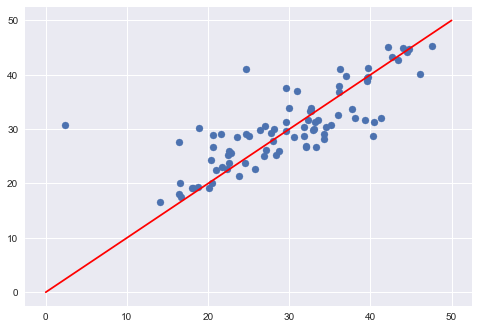

In [15]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.plot( [0,50],[0,50], c="red" )

In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error


print(mean_squared_error(Y_test,Y_pred))
print(explained_variance_score(Y_test, Y_pred))
print(rf.feature_importances_)

30.3600360722
0.606236331248
[ 0.23522388  0.65143151  0.11334462]


### Preprocesamos y comparamos resultados con RFR

In [59]:
from sklearn.preprocessing import RobustScaler

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_lm_x, df_lm_y, test_size=0.30, random_state=42)

In [66]:
X_train_rs = RobustScaler().fit_transform(X_train)

In [76]:
X_test_rs = RobustScaler

NotFittedError: This RobustScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [67]:
rf_robust = RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2)

In [74]:
rf_robust.fit(X_train_rs,Y_train)
Y_pred = rf_robust.predict(X_test_rs)

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


TypeError: float() argument must be a string or a number, not 'RobustScaler'

In [51]:
#Grid Search con RFR

In [72]:
from sklearn.model_selection import GridSearchCV
#max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2
rfr = RandomForestRegressor(n_jobs=1, random_state=0, max_features=2)
param_grid = {'n_estimators': [1000]}
# 'n_estimators': [1000], 'max_features': [10,15,20,25], 'max_depth':[20,20,25,25,]}
model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=10)

model.fit(X=X_train, y=Y_train)
print('Random forecast regression...')
print('Best Params:')
print(model.best_params_)
print('Best CV Score:')
print(-model.best_score_)

Y_pred = model.predict(X_test)

C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y wa

Random forecast regression...
Best Params:
{'n_estimators': 1000}
Best CV Score:
-0.416737281625


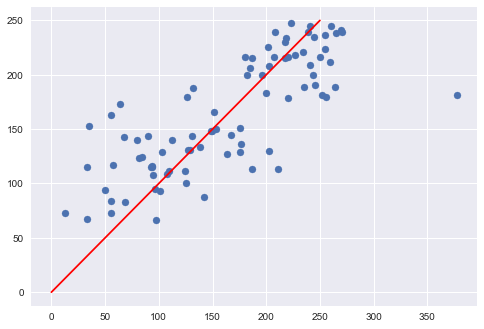

In [73]:
plt.scatter(Y_test, Y_pred)
plt.plot( [0,250],[0,250], c="red" )

In [74]:
metrics.explained_variance_score(Y_test, Y_pred)

0.59974295184543747

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [16]:
X_test.describe()

,spd,porc,viento_aparente
count,85.000000,85.000000,85.000000
mean,29.774977,-0.043758,-0.245387
std,8.786220,2.346467,7.378233
min,2.375887,-6.677410,-14.676919
25%,22.573802,-1.186859,-7.310950
50%,29.952505,-0.040300,-1.930644
75%,36.073203,1.345029,7.236944
max,47.536057,5.452840,10.326711


In [17]:
Y_test.describe()

,pwr
count,85.000000
mean,163.669075
std,75.197283
min,13.116462
25%,97.603894
50%,175.690544
75%,223.351979
max,377.761160


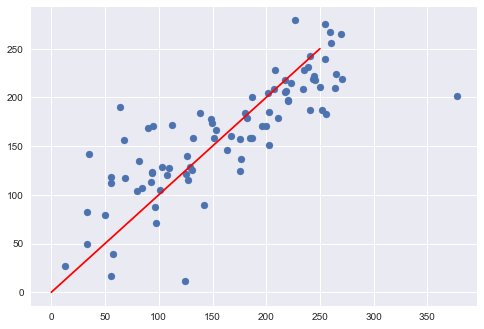

In [18]:
plt.scatter(Y_test, Y_pred)
plt.plot( [0,250],[0,250], c="red" )


Coefficients: 
 [[  4.72862885e+00   3.46786976e+01   2.83839792e-02]]
Mean squared error: 1952.00
Variance score: 0.65


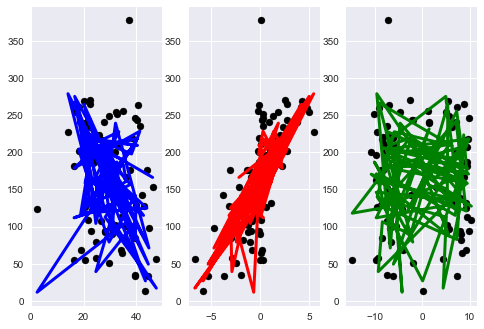

In [19]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.subplot(131)
plt.scatter(X_test['spd'], Y_test,  color='black')
plt.plot(X_test['spd'], Y_pred, color='blue', linewidth=3)
plt.grid(True)

plt.subplot(132)
plt.scatter(X_test['porc'], Y_test,  color='black')
plt.plot(X_test['porc'], Y_pred, color='red', linewidth=3)
plt.grid(True)

plt.subplot(133)
plt.scatter(X_test['viento_aparente'], Y_test,  color='black')
plt.plot(X_test['viento_aparente'], Y_pred, color='green', linewidth=3)
plt.grid(True)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [20]:
#Probamos otra cosa. Vamos a darle al modelo calculados los terminos de la formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

$P = \frac{\rho}{2}(V+wV)^2VCdA+CrmgV+\%mgV$

In [21]:
#añadimos aqui
#df_lm_x = df[['spd','porc','viento_aparente']]
#df_lm_y = df[['pwr']]

df_lm_x['termino_cda'] = (df_lm_x['spd']+df_lm_x['viento_aparente'])**2*df_lm_x['spd']
df_lm_x['termino_roz'] = df_lm_x['spd']*90
df_lm_x['termino_cte'] = df_lm_x['spd']*df_lm_x['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [22]:
df_lm_x

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
0,32.807547,-3.377386,8.398054,55703.986719,2952.679245,-9972.338295
1,17.702449,4.181100,5.337415,9397.085569,1593.220408,6661.413079
2,38.776567,-1.737873,8.311220,85977.722772,3489.891065,-6064.986292
3,24.396708,2.662585,8.704791,26731.698368,2195.703725,5846.247560
4,35.437811,-0.873144,8.487546,68375.021370,3189.402973,-2784.809017
5,26.917836,1.566720,8.945233,34620.635585,2422.605198,3795.544367
6,36.101408,-1.730661,8.230976,70952.274290,3249.126761,-5623.138156
7,22.792053,2.126107,4.616644,17122.226443,2051.284768,4361.250254
8,32.620000,-1.471857,3.116946,41659.958918,2935.800000,-4321.076598
9,27.138462,0.946517,-0.390809,19415.857765,2442.461538,2311.831178


In [23]:
df_lm_x.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,30.441215,-0.033003,-0.594445,35650.731392,2739.709366,-1349.873547
std,9.137827,2.166262,7.454853,34510.890189,822.404425,6346.142209
min,0.770052,-6.677410,-14.676919,0.051960,69.304707,-28567.595098
25%,24.412312,-1.072187,-7.399050,12783.359760,2197.108118,-3124.752890
50%,29.964252,-0.013285,-2.633167,27316.294886,2696.782684,-14.528036
75%,36.381969,1.194253,7.282974,47645.663198,3274.377190,2605.206284
max,64.800000,7.137195,18.939865,327029.016132,5832.000000,7793.320282


In [24]:
df_lm_x2 = df_lm_x[['termino_cda','termino_roz','termino_cte']]
df_lm_y2 = df_lm_y[['pwr']]

In [25]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_lm_x2, df_lm_y2, test_size=0.30, random_state=42)

In [26]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Make predictions using the testing set
Y_pred2 = regr2.predict(X_test2)

In [28]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_pred2))



Coefficients: 
 [[ 0.00080115  0.02073605  0.01128024]]
Mean squared error: 2803.96
Variance score: 0.50


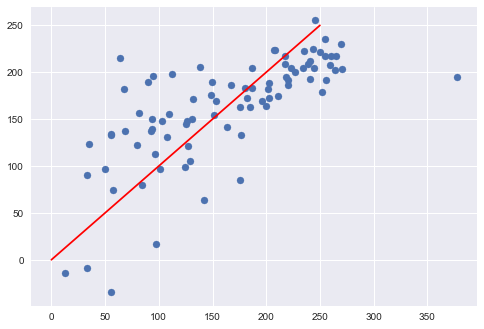

In [29]:
plt.scatter(Y_test2, Y_pred2)
plt.plot( [0,250],[0,250], c="red" )

### Ridge

In [30]:
rid = linear_model.Ridge(alpha=0.5)

In [31]:
rid.fit(X_train2,Y_train2)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
Y_predict_rid = rid.predict(X_test2)

In [33]:
# The coefficients
print('Coefficients: \n', rid.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid))

Coefficients: 
 [[ 0.00080115  0.02073605  0.01128024]]
Mean squared error: 2803.96
Variance score: 0.50


In [34]:
rid2 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])

In [35]:
rid2.fit(X_train2,Y_train2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [36]:
Y_predict_rid2 = rid.predict(X_test2)

In [37]:
# The coefficients
print('Coefficients: \n', rid2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid2))

Coefficients: 
 [[ 0.00080115  0.02073604  0.01128025]]
Mean squared error: 2803.96
Variance score: 0.50


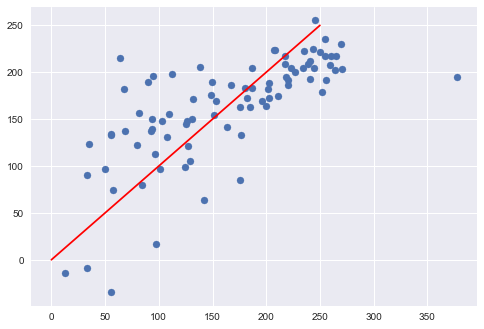

In [38]:
plt.scatter(Y_test2, Y_predict_rid2)
plt.plot( [0,250],[0,250], c="red" )

In [39]:
['pwr','spd','porc','viento_aparente']

['pwr', 'spd', 'porc', 'viento_aparente']

### Filtramos potencias >100w y <350w

In [40]:
df_lm2 = df.loc[(df['pwr']>100)&(df['pwr']<350)]

In [41]:
df_lm2

,tramo,tramo_inicial,tramo_final,pwr,time_seg,dist,spd,viento_aparente,porc,prueba
1,1,65,432,255.381555,980,4819.000000,17.702449,5.337415,4.181100,20180406_LEVS_195_90_R_E.gpx
2,2,432,468,152.194252,44,473.935824,38.776567,8.311220,-1.737873,20180406_LEVS_195_90_R_E.gpx
3,3,468,532,248.770434,120,813.223602,24.396708,8.704791,2.662585,20180406_LEVS_195_90_R_E.gpx
4,4,532,548,155.753257,21,206.720563,35.437811,8.487546,-0.873144,20180406_LEVS_195_90_R_E.gpx
5,5,548,636,217.073745,170,1271.120011,26.917836,8.945233,1.566720,20180406_LEVS_195_90_R_E.gpx
7,7,688,892,219.577239,453,2868.000000,22.792053,4.616644,2.126107,20180406_LEVS_195_90_R_E.gpx
9,9,985,1024,202.978559,78,588.000000,27.138462,-0.390809,0.946517,20180406_LEVS_195_90_R_E.gpx
11,11,1095,1126,168.365547,74,437.000000,21.259459,7.950309,1.298545,20180406_LEVS_195_90_R_E.gpx
15,15,1148,1206,201.860105,140,703.000000,18.077143,-7.570676,2.748246,20180406_LEVS_195_90_R_E.gpx
16,16,1206,1252,102.681604,87,768.000000,31.779310,5.259195,-1.301930,20180406_LEVS_195_90_R_E.gpx


In [42]:
#añadimos aqui
df_lm_x2 = df_lm2[['spd','porc','viento_aparente']]
df_lm_y2 = df_lm2[['pwr']]

df_lm_x2['termino_cda'] = (df_lm2['spd']+df_lm2['viento_aparente'])**2*df_lm2['spd']
df_lm_x2['termino_roz'] = df_lm2['spd']*90
df_lm_x2['termino_cte'] = df_lm2['spd']*df_lm2['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [43]:
df_lm_x2

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
1,17.702449,4.181100,5.337415,9397.085569,1593.220408,6661.413079
2,38.776567,-1.737873,8.311220,85977.722772,3489.891065,-6064.986292
3,24.396708,2.662585,8.704791,26731.698368,2195.703725,5846.247560
4,35.437811,-0.873144,8.487546,68375.021370,3189.402973,-2784.809017
5,26.917836,1.566720,8.945233,34620.635585,2422.605198,3795.544367
7,22.792053,2.126107,4.616644,17122.226443,2051.284768,4361.250254
9,27.138462,0.946517,-0.390809,19415.857765,2442.461538,2311.831178
11,21.259459,1.298545,7.950309,18138.795536,1913.351351,2484.572208
15,18.077143,2.748246,-7.570676,1995.460611,1626.942857,4471.239652
16,31.779310,-1.301930,5.259195,43596.475958,2860.137931,-3723.699076


In [44]:
df_lm_x2.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,29.735805,0.455457,-0.548822,32335.724842,2676.222446,76.782296
std,8.507774,1.961889,7.425132,28721.604480,765.699695,5090.272188
min,0.770052,-4.284866,-12.231794,8.039146,69.304707,-20338.717143
25%,23.686989,-0.601474,-7.440743,12699.409936,2131.829026,-1815.001786
50%,29.712799,0.114959,-2.465296,24292.527129,2674.151873,296.140204
75%,35.268905,1.619251,7.183425,44725.634359,3174.201487,3765.190072
max,52.740449,7.137195,18.939865,207065.834974,4746.640448,7793.320282


In [45]:
df_lm_y2.describe()

,pwr
count,219.000000
mean,191.522134
std,49.502506
min,100.998157
25%,155.187883
50%,194.453542
75%,234.449697
max,338.535682


In [46]:
df_lm_x3 = df_lm_x2[['termino_cda','termino_roz','termino_cte']]
df_lm_y3 = df_lm_y2[['pwr']]

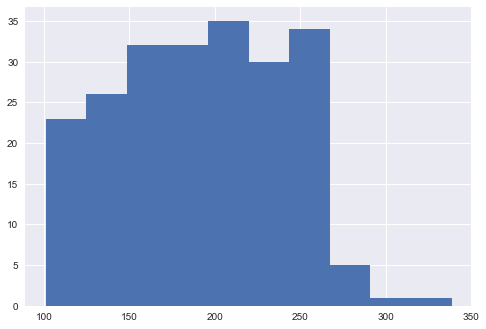

In [47]:
plt.hist(df_lm_y3['pwr'])
plt.show()

In [48]:
len(df_lm_x3)==len(df_lm_y3)

True

In [49]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_lm_x3, df_lm_y3, test_size=0.30, random_state=42)

In [50]:
# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Make predictions using the testing set
Y_pred3 = regr3.predict(X_test3)

In [52]:
# The coefficients
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test3, Y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test3, Y_pred3))



Coefficients: 
 [[ -2.85775453e-05   2.14268970e-02   8.15256473e-03]]
Mean squared error: 1644.86
Variance score: 0.36


In [53]:
X_train3

,termino_cda,termino_roz,termino_cte
13,24874.730641,2190.527954,5363.670183
19,44289.744843,2663.205073,4353.677680
85,6821.986924,2096.941046,5632.154671
37,3040.988220,1765.117517,5357.477114
28,14157.917852,2862.000000,-265.228064
48,21371.805685,2670.027687,-3584.776400
19,9814.360797,1840.472188,5902.914310
52,27586.785914,2935.039749,-3344.603487
45,5196.135214,2052.476998,1253.058350
61,4685.263586,2031.642160,3892.797141


In [54]:
df_lm_x2.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,29.735805,0.455457,-0.548822,32335.724842,2676.222446,76.782296
std,8.507774,1.961889,7.425132,28721.604480,765.699695,5090.272188
min,0.770052,-4.284866,-12.231794,8.039146,69.304707,-20338.717143
25%,23.686989,-0.601474,-7.440743,12699.409936,2131.829026,-1815.001786
50%,29.712799,0.114959,-2.465296,24292.527129,2674.151873,296.140204
75%,35.268905,1.619251,7.183425,44725.634359,3174.201487,3765.190072
max,52.740449,7.137195,18.939865,207065.834974,4746.640448,7793.320282


In [55]:
len(Y_pred3)

66

In [56]:
results = pd.DataFrame(X_test3)

In [57]:
 results['Y_test'] = Y_test3

In [58]:
 results['Y_pred'] = Y_pred3

In [59]:
results['dif'] = results['Y_test']-results['Y_pred']

(array([  2.,   7.,   9.,   9.,  12.,  12.,   7.,   6.,   1.,   1.]),
 array([-97.26528157, -78.18082341, -59.09636525, -40.01190708,
        -20.92744892,  -1.84299076,  17.2414674 ,  36.32592556,
         55.41038372,  74.49484188,  93.57930005]),
 <a list of 10 Patch objects>)

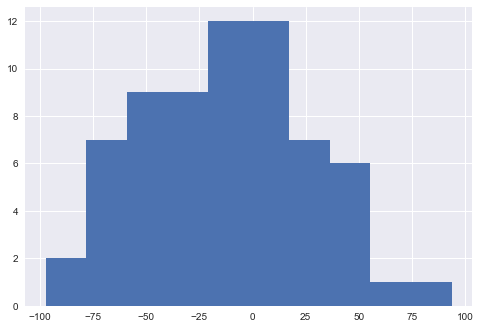

In [60]:
plt.hist(results['dif'])

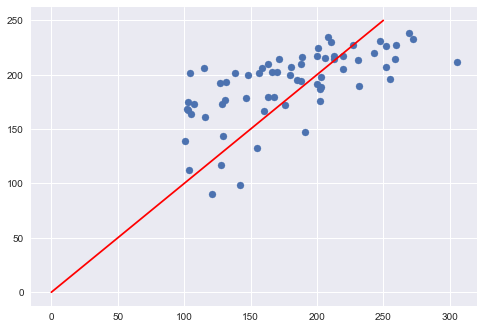

In [61]:
plt.scatter(Y_test3, Y_pred3)
plt.plot( [0,250],[0,250], c="red" )

In [62]:
from sklearn import metrics

In [63]:
metrics.explained_variance_score(Y_test3, Y_pred3)

0.4182032439230422